# Research on global Ice video game sales

### Objective 
The goal of this project is to identify trends in the video game market based on Ice's global sales history in order to help predict whether new games will be successful. This will help the company determine how to allocate advertising funds for the highest return on sales.

### Decription of the data
**Data file:** `games.csv`
 * `Name`: Game title.
 * `Platform`: Gaming platform.
 * `Year_of_Release`: Game's year of release.
 * `Genre`: Game genre.
 * `NA_sales`: North American sales in USD million.
 * `EU_sales`: sales in Europe in USD million.
 * `JP_sales`: sales in Japan in USD million.
 * `Other_sales`: sales in other countries in USD million
 * `Critic_Score`: Score of game critics (out of 100)
 * `User_Score`: User's game score (out of 10)
 * `Rating`: ESRB rating system - age & content ratings intended for the consumer

## 1. General Exploration of the Data

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as Cmap

In [2]:
# Read file and save
try:
    games = pd.read_csv('games.csv')
except:
    games =  pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9147,Power Gig: Rise of the SixString,PS3,2010.0,Misc,0.13,0.00,0.00,0.01,36.0,0.5,T
1287,Fight Night 2004,PS2,2004.0,Fighting,1.08,0.20,0.00,0.20,85.0,9,T
13546,TOCA Race Driver 2,XB,2004.0,Racing,0.03,0.01,0.00,0.00,NaN,8.3,T
2767,Red Faction: Guerrilla,PS3,2009.0,Shooter,0.33,0.27,0.02,0.12,85.0,8.1,M
6070,Power Pro Kun Pocket 11,DS,2008.0,Sports,0.00,0.00,0.29,0.00,NaN,NaN,NaN


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


The columns 'critic_score', 'user_score', 'rating' have a significant amount of null values.<br>
A small portion of 'year_of_release' contains nulls.<br>
Name & genre have an equal number of null values. It is possible the correspond.

In [8]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
games.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


There are a significant number of zeros in all sales columns. These are likely just sales that were too low to show up after rounding. Not every game can be a smashing success.
The most frequent user_score is "tbd", signifying that a lot of data was input before a score was available.
Several columns need to be changed to the appropriate datatype.

In [10]:
# Peek into platform types
games.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
# Peek into most common games
games.Name.value_counts().head(10)

Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
LEGO The Hobbit                  8
FIFA Soccer 13                   8
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Monopoly                         8
Name: Name, dtype: int64

In [12]:
# Explore duplicate names
games[games.Name == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Duplicate names exist for games released across different platforms and/or different years.

In [13]:
# Peek into genres by frequency
games.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [14]:
# Peek into ESRB ratings
games.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Uncommon ratings  definitions**
- EC: Early Childhood (pre-school age); only active 1994-2008
- RP: "Rating Pending". Missing value.
- K-A: "Kids to Adults". Active 1994-1998; replaced with E in 1998.
- AO: "Adults Only". Basically porn.

### 1.1 Conclusion

<div class="alert alert-block alert-info">

The games dataset contains many problems. A significant amount of data is missing across columns, and much of it seems to be outdated. These problems should be discussed with our data source. 
    
<b>Missing values</b> <br>

There is a signifcant portion of null data from the critic score and user score columns. Additionally, 2424 instances of user score are marked with 'tbd'. Critic scores generally come before or immediately after games are released, whereas user scores generally take time to collect as people buy and play through the games. This may explain the values being 'tbd' at the time of posting. These values should belong to recently released games, though this seems unlikely with such a high frequency. It is possible that less popular games are missing more of these values.

ESRB rating and year of release are also missing from several rows. This could be an oversight or some kind of export error, as the values are very easy to aquire. Much of our analysis depends on the year column, so this could affect our analysis poorly. Rating also cotains the value 'RP' (rating pending), which should be treated as a missing value. 

There are equal null values in the name and genre columns. It is likely that the correspond to each other. These will likely be dropped due to having too much information missing.

It may be possible to fill nulls in most of the columns using data from games with duplicate titles.
<br>
<b>Incorrect datatypes</b> <br>
Year of release should be changed from float type to int type. The 'tbd' values in user score caused the column values <br>
<b>Additional insights</b> <br>
    
Data goes all the way back to 1st generation consoles in 1980. A lot of this data will be irrelevant for current market analysis. Several of these gaming systems are no longer in production.

Critic score and user score use different scales. They will need to be modified for direct comparison.

There are large differences in popularity of different platforms and genres. For genres, action seemms to dominate the market, followed by sports games. The PS2 and DS have the highest number of games, followed by other major platforms from competing companies (Wii from Nintendo, and XBox 360 from XBox)

There are some outdated ESRB ratings in this set. They will be converted to their modern counterparts for smoother analysis. K-A and EC both fall under the current E rating. AO is an incredibly rare rating, which is not surprising because it is not a very marketable category.

Across all sales regions, 25% of games have sales values of 0.0. These are likely values far below 1 million, so they are rounded down to 0.  North American sales tend to be the highest, and Japan sales are the lowest (at least 50% of Japanese game sales are too low to be visible when rounded to millions).

    
</div>

## Step 2. Prepare the data

### 2.1 Change column names

In [15]:
# Convert all column names to lower case
games.columns = games.columns.str.lower()

# Check it
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Convert data types

In [16]:
# Check if games with 'user_score' == 'tbd' are recent by calculating average
avg_year_tbd = games[games.user_score == 'tbd']['year_of_release'].mean()
print('Average release year of TBD user scores: {:.0f}'.format(avg_year_tbd))

Average release year of TBD user scores: 2007


Games with a 'tbd' user_score are 9 years old on average. They do not correspond with new releases and so should be filled with nulls and handled as missing values.

In [17]:
# Replace 'tbd' with nulls
games.user_score.replace(to_replace = 'tbd', value = np.nan, inplace = True)

#Check it
games.describe(include = object)

,name,platform,genre,user_score,rating
count,16713,16715,16713,7590,9949
unique,11559,31,12,95,8
top,Need for Speed: Most Wanted,PS2,Action,7.8,E
freq,12,2161,3369,324,3990


In [18]:
# Convert year_of_release to int type. Fill nulls with 0 to avoid conversion error.
games.year_of_release = games.year_of_release.astype('Int64')
# Convert 'user_score' to float type
games.user_score = games.user_score.astype('float')
#Rating to category type
games.rating = games.rating.astype('category')

#Check it
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


### 2.3 Process missing values

In [19]:
# Create copy of games to fill data without affecting the original dataset
games_fill = games.copy()

#### 2.3.1 Fill Missing Values

In [20]:
# Replace K-A and EC ratings with E
games_fill.replace({'rating': ['K-A', 'EC']}, 'E', inplace=True)
# Convert RP to null
games_fill.replace({'rating': 'RP'}, np.nan, inplace=True)
#Check it
games_fill.rating.value_counts()

E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

In [21]:
# Define function to loop through columns with ffill and bfill
def fb_fill(col):
    games_fill[col]= games_fill.groupby('name')[col].fillna(method='ffill')
    games_fill[col]= games_fill.groupby('name')[col].fillna(method='bfill') 

In [22]:
# Run all columns with nulls through fb_fill
fill_cols = ['year_of_release', 'rating','user_score','critic_score']
for col in fill_cols:
    fb_fill(col)
games_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16567 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     9098 non-null   float64 
 9   user_score       8689 non-null   float64 
 10  rating           10384 non-null  category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


A few thousand values were successfully filled using existing data from duplicate titles.

#### 2.3.2 Drop missing values

In [23]:
# Copy games_fill to remove problematic rows
games_clean = games_fill.copy()

In [24]:
# Check rows with null names
games_clean[games_clean.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,<NA>,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,<NA>,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Null name and genre values do match. All data is missing except of platform and sales.

In [25]:
#Check rows with year of release missing
(games_clean[games_clean.year_of_release.isnull() 
             & (games_clean.na_sales >0.5)
            ].sort_values('na_sales', ascending = False)
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
659,NaN,GEN,<NA>,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,Combat,2600,<NA>,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
2106,Air-Sea Battle,2600,<NA>,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,NaN
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN


There is no clear pattern for missing year of release. Several top grossing games with missing years are on outdated platforms (GEN, 2600). These platforms are not relevant to current market trends, so we can drop them without repurcussion. Overall, only a small percentage of games are missing years. Since our analysis is strongly based on year_of_release, it is best to drop these. Though we will manually fill year for a few games with high sales, excluding highly outdated systems.

In [26]:
#Create dictionary of game titles and years to manually fill
name_year = {"Frogger's Adventures: Temple of the Frog":2001,
             'Rock Band': 2007,
             'wwe Smackdown vs. Raw 2006': 2005,
            }
#Fill missing years using dict name_year
games_clean['year_of_release'] = games_clean['year_of_release'].fillna(games_clean.name.map(name_year))

#Check Rock Band to see if it worked
games_clean[games_clean.name == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,2007,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,2007,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,2007,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,2007,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [27]:
# Drop rows where name/genre is null, or year_of_release is null
games_clean = games_clean.dropna(subset = ['name', 'year_of_release']).reset_index(drop=True)
# Convert year to standard int type for later purposes
games_clean['year_of_release'] = games_clean['year_of_release'].astype('int')
# Check that rows dropped successfully
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16573 entries, 0 to 16572
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16573 non-null  object  
 1   platform         16573 non-null  object  
 2   year_of_release  16573 non-null  int64   
 3   genre            16573 non-null  object  
 4   na_sales         16573 non-null  float64 
 5   eu_sales         16573 non-null  float64 
 6   jp_sales         16573 non-null  float64 
 7   other_sales      16573 non-null  float64 
 8   critic_score     9040 non-null   float64 
 9   user_score       8643 non-null   float64 
 10  rating           10309 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.3+ MB


### 2.4 Calculate total sales

Calculate the sum of sales in all regions for each game

In [28]:
#Add together all sales columns for total_sales
games_clean['total_sales'] = games_clean[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
                            
games_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [29]:
# Check for difference in total_sales between missing critic_score and not null critic_score
print('Average total sales for games missing critic_score: {:.2f} mil'.format(
            games_clean[games_clean.critic_score.isnull()]['total_sales'].mean())
     )
print('Average total sales for games with critic_score: {:.2f} mil'.format(
            games_clean[games_clean.critic_score.notnull()]['total_sales'].mean())
     )

Average total sales for games missing critic_score: 0.38 mil
Average total sales for games with critic_score: 0.66 mil


### 2.5 Conclusion

<div class="alert alert-block alert-info">
    
All column names were converted to lower case for easier coding. Columns were also converted to their proper data types. ESRB ratings were adjusted to remove any out-dated rating types so ratings could be properly compared regardless of release date.

TBD values in user_score did not correlate to new games as expected. These values were likely not available when the games were first released and added to the data source. There was likely no system in place to update these values  later on. They are now just missing values and were therefore converted to NaNs.

Several nulls in year_of_release, rating, critic_score, & user_score were filled with values from other rows of games with the same name available for other platforms. Additional nulls in year_of_release with high sales were filled manually. Remaining null years were dropped. It would be too time consuming to fill them manually and the value is necessary for the bulk of our analysis. Left remaining missing values for rating, user_score, and critic_score, as these columns are not necessary for all parts of our analysis.
    
Games missing critic scores have much lower total sales than games with critic scores. Critics often have early access to games in order to help promote new releases. Some scores may be missing because the game releases were simply too small or poorly advertised.

Missing names corresponded with missing genres. These rows were also missing all data except sales & platform, and so were dropped. They were both on Genesis, which is a highly outdated platform, so dropping them will not affect later analysis.

No clear pattern for remaining missing values. Could be an input error or an export error. Also there seems to not be a cleasr protocol for updating data after rstings and scores become available. Values could largely be filled manually by searching online, though this is too time-consuming. It is best to discuss this problem with the data source.
    
</div>

## 3. Analyze the data

### 3.1 Game releases by year
Look at how many games were released in different years. Is the data for every period significant?

In [30]:
# df of number of games released per year
year_data = (games_clean[['year_of_release','name']].groupby('year_of_release')
                                                    .count()
                                                    .sort_values('year_of_release')
                                                    .reset_index()
            )
#year_data

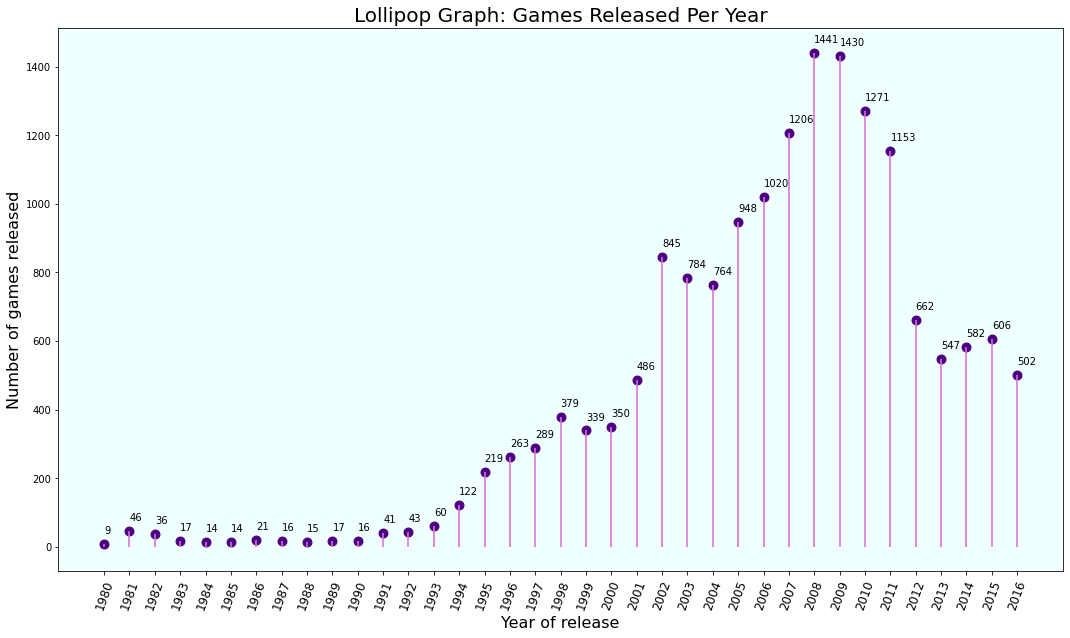

In [31]:
# Graph representing the number of games released each year
fig,ax=plt.subplots(figsize=(18,10))

ax.vlines(x=year_data.year_of_release, ymin=0, ymax=year_data.name, color='orchid',alpha=.8, linewidth=2)
ax.scatter(x=year_data.year_of_release, y=year_data.name, s=80, color='indigo', alpha=1)

ax.set_title('Lollipop Graph: Games Released Per Year', fontdict={'size':20})
ax.set_ylabel('Number of games released', fontdict={'size':16})
ax.set_xlabel('Year of release', fontdict={'size':16})
ax.set_facecolor('azure')

ax.set_xticks(year_data.year_of_release)
ax.set_xticklabels(year_data.year_of_release,
                   rotation=70,
                   fontdict={'horizontalalignment':'center', 'size':12})

for row in year_data.itertuples():
    ax.text(row.year_of_release, row.name+30, s=row.name)

#### Conclusion

<div class="alert alert-block alert-info">
<b>Analysis of Yearly Trends</b><br>
    
- From 1980 to 1993, not many games were released yearly. Gaming consoles were not very advanced at the time, and game development was limited.
- 1993 marks the beginning of 5th generation platforms. This meant more platforms available, as well as more advanced technology. This likely explains the steady incline of new release from 1993-1998.
-By 2000, Atari was completely obselete; Sega's final platform Dreamcast(DC) failed, causing the death of their brand; and no new platforms were released. These factors likely led to the 1999-2000 dip.
- After the release of the PS2, we see a sudden jump in 2001. A huge jump in new releases in 2002 was marked by the introduction of XBox, and Nintendo's release of Game Cube (GC) and Game Boy Advance (GBA). Since then, Nintendo, PlayStation, and Nintendo have kept their hold on the market.
- The small dip that follows in likely due to the stability of these platforms in the market with no new systems to boost new releases. 
- This is followed by a huge increase in yearly releases up through 2009. Not only did these companies continue releasing new platforms (alternating between handheld and home systems), but previous platforms remained active for several years of overlap with newer generations. More systems led to multiple releases of the same titles, while each company also raced for exclusive titles to set them apart. This time frame also includes the introduction of motion sensor gaming with the Wii in 2006.
- In 2009 the platform market was stable (no new systems), but also touchscreen smart phones were becoming more widely available. This led to the devlopmend of mobile gaming, which may have impacted the game sales market (especially following the introduction of Angry Birds in 2009, the first mobile game to gain significant popularity and show the worth of mobile game development). From there, new releases dropped. In 2010 & 2011 the only new platforms were upgrades to previous handheld platforms. While this may have steadied the decline in new releases, in 2012 there was another significant drop.
- Releases increased a little again in 2014-2015 with the simultaneous release of the PS4 and XBox One, but the height of new releases was not recovered. Though the jump in technological improvent between 7th & 8th generation platforms was not nearly as dramatic as the advancements between previous generations of consoles.

    
<b>Summary</b><br>
The number of new releases seems to be strongly tied to 2 factors: the release of new platforms, and the degree to which the technology advanced with the new platforms. New platforms beget new games. New platforms with significntly advanced technology create entirely new possibilities for game developers.<br>
For analysis on current gaming trends, any data pre-dating the introduction of XBox (2002) is irrelevant. Nintendo, Playstation, and XBox are the only major players in gaming world, alongside the underlying current of PC gaming.
    
</div>

### 3.2 Sales by platform

Analyze how sales varied between platforms.

#### 3.2.1 Distribution of Global Sales by Platform
Identify high-sales platforms and analyze sales trends over time.
Z-score analysis of global sales will be used to determine the success of each platform compared to the average.

Company names will be assigned to each row for filtering purposes

In [32]:
# Create dictionary for platforms and their companies
plat_company = {'Atari':'2600',
                'Sega':['GEN','SCD','GG','DC','SAT'] ,
                'Nintendo': ['NES','GB','SNES','N64','GBA','GC','DS','Wii','3DS','WiiU'],
                'PlayStation': ['PS','PS2','PSP','PS3','PS4','PSV'],
                'XBox':['XB','X360','XOne'],
                'Other':['WS','PCFX','TG16','3DO','NG','PC']
                }

# Function to assign company names by platform
def get_company(r):
    p=r.platform
    for k, v in plat_company.items():
        if p in v:
            return k

games_clean['company'] = games_clean.apply(get_company,axis=1)

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories= ['Atari','Nintendo','Sega','PlayStation','XBox','Other'],
                            ordered=True)
games_clean['company'] = games_clean['company'].astype(cat_type)

In [33]:
games_clean.groupby('company')['platform'].unique()

company
Atari                                                     [2600]
Nintendo       [Wii, NES, GB, DS, SNES, GBA, 3DS, N64, WiiU, GC]
Sega                                     [GEN, DC, SAT, SCD, GG]
PlayStation                        [PS3, PS2, PS4, PS, PSP, PSV]
XBox                                            [X360, XB, XOne]
Other                              [PC, WS, NG, TG16, 3DO, PCFX]
Name: platform, dtype: object

First we will graph and analyze sales across all platforms

In [34]:
# df of total_sales by platform
plat_sales_all = (games_clean[['platform', 'total_sales']]
                  .groupby('platform')
                  .sum()
                  .sort_values('total_sales')
                  .reset_index())

In [35]:
# Calculate z-score of sales by platform
plat_sales_all['z_sales'] = ((plat_sales_all['total_sales'] - plat_sales_all['total_sales'].mean())
                             / plat_sales_all['total_sales'].std()
                            )
# Assign colors based on z-score. Red: negative, Green: positive
plat_sales_all['color'] = ['red' if x<0 else 'green' for x in plat_sales_all['z_sales']]

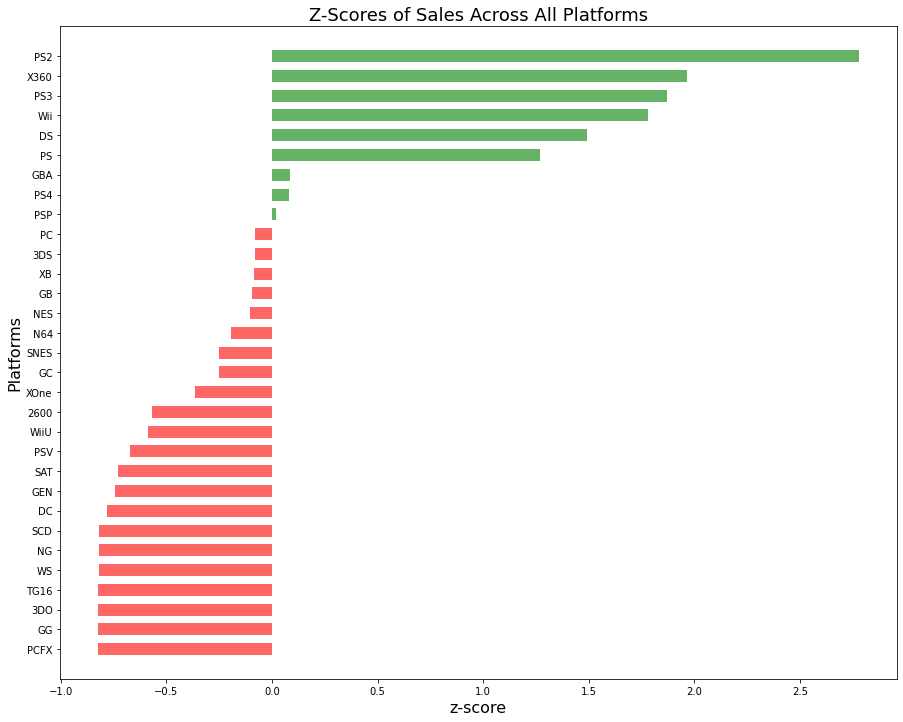

In [36]:
# Build graph of z-score by platform
plt.figure(figsize = (15,12))
plt.hlines(y=plat_sales_all.platform,
           xmin=0,
           xmax= plat_sales_all.z_sales,
           color=plat_sales_all.color,
           alpha = .6,
           linewidth= 12
          )
plt.title('Z-Scores of Sales Across All Platforms', size=18)
plt.xlabel('z-score',size=16)
plt.ylabel('Platforms',size=16)
plt.show();

<div style="border:solid blue 2px; padding: 20px">       
<b>Z-score Analysis</b><br>
    
Platforms with above average performace appear in 3 tiers: slightly above average(GBA, PS4, and PSP), moderately above average (X360, PS3, Wii, DS, PS), and then the PS2 in a league of its own at 2.78 standard deviations. The standard devation covers a wide range from (-.82) to (2.78).
<br><br>
PlayStations home systems were successful across the board, with the PS2 absolutely dominating the market. Only the handheld PSV fell below the average. Xbox managed to catch up with their second platform, the X360. Many platforms performing below average are from older generations, where the market was significantly smaller than the current market. Though some recently released platforms (WiiU, XOne) seem to fall behind, likely because their sales history is significantly shorter. The Nintendo DS far outperformed other handheld systems.
</div>

Repeat analysis on major platforms from 2002 onwards


In [37]:
# Define relevant companies
top3 = ['Nintendo', 'XBox', 'PlayStation']
# Filter games_clean
games_clean_filt = games_clean.query('platform == "PC" | year_of_release > 2001 & company in @top3')
# df of total_sales by platform
plat_sales_filt = (games_clean_filt[['platform', 'total_sales']]
                  .groupby('platform')
                  .sum()
                  .sort_values('total_sales')
                  .reset_index())

# Calculate z-score of sales by platform
plat_sales_filt['z_sales'] = ((plat_sales_filt['total_sales'] - plat_sales_filt['total_sales'].mean())
                             / plat_sales_filt['total_sales'].std()
                            )
# Assign colors based on z-score. Red: negative, Green: positive
plat_sales_filt['color'] = ['red' if x<0 else 'green' for x in plat_sales_filt['z_sales']]

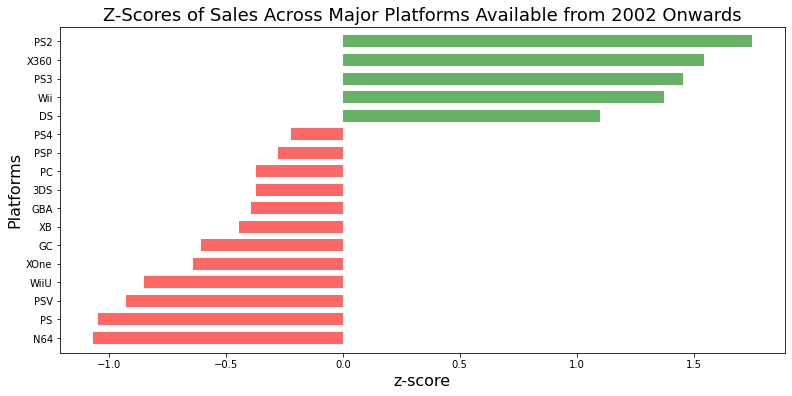

In [38]:
# Build graph of z-score by platform
plt.figure(figsize = (13,6))
plt.hlines(y=plat_sales_filt.platform,
           xmin=0,
           xmax= plat_sales_filt.z_sales,
           color=plat_sales_filt.color,
           alpha = .6,
           linewidth= 12
          )
plt.title('Z-Scores of Sales Across Major Platforms Available from 2002 Onwards', size=18)
plt.xlabel('z-score',size=16)
plt.ylabel('Platforms',size=16)
plt.show();

In [39]:
plat_sales_all[['platform','z_sales']]
plat_sales_filt[['platform','z_sales']]
z_compare = (plat_sales_filt[['platform','z_sales']]
             .merge(plat_sales_all[['platform','z_sales']],
                    on = 'platform',
                    how='outer')
            )
z_compare.columns=('platform', 'new_z', 'old_z')

z_compare['z_diff'] = z_compare['new_z']-z_compare['old_z']

print('Platforms that were dead or irrelevant by 2002')
print(list(z_compare[z_compare.new_z.isnull()]['platform']))
z_compare[z_compare.new_z.notnull()]


Platforms that were dead or irrelevant by 2002
['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT', '2600', 'SNES', 'NES', 'GB']


,platform,new_z,old_z,z_diff
0,N64,-1.069228,-0.195938,-0.873290
1,PS,-1.046763,1.270029,-2.316792
2,PSV,-0.925214,-0.670109,-0.255105
3,WiiU,-0.848676,-0.588388,-0.260288
4,XOne,-0.640665,-0.366291,-0.274375
5,GC,-0.606361,-0.253010,-0.353351
6,XB,-0.444817,-0.085911,-0.358906
7,GBA,-0.390367,0.085248,-0.475615
8,3DS,-0.373107,-0.080613,-0.292494
9,PC,-0.372217,-0.079663,-0.292554


<div style="border:solid blue 2px; padding: 20px">       
<b>Z-score Analysis from 2002</b><br>

The new distribution range is more symmetric than the previous. While the PS2 still outperforms the other platforms, its zscore falls by an entire standard deviation. Its place at the top of the market appears much less extreme.<br>
    
The top 5 platforms remain the same between the full spectrum of sales and the updated post-2002 sales. The PS is the only home console that falls from an above average position to a below average position. This is because the PS fully ends production early into the new range. Every handheld platform except the DS also falls below the industry average. This suggests handheld platforms and home consoles have very different overall markets. PCs remain below the average, but at a less extreme rate. Once again, the most recent releases of each company fall below the average due to their limited sales history and overlap with their previous generation.
    
</div>

#### 3.2.2 Sales Trends of Popular Platforms
Analyze how platforms perform over time


In [40]:
# Identify popular platforms
lead_platforms = plat_sales_all['platform'].tail(6)

In [41]:
# Create df of platform yearly sales for full lifespan
yearly_plat_sales = (games_clean.query('platform in @lead_platforms')
                               .pivot_table(index=['platform','year_of_release'],
                                            values=['total_sales'],
                                            aggfunc='sum')       
                    )
yearly_plat_sales.reset_index(inplace=True)
# Input mistake occurs for a DS game with 1985 release year 
yearly_plat_sales = yearly_plat_sales.query('year_of_release != 1985')

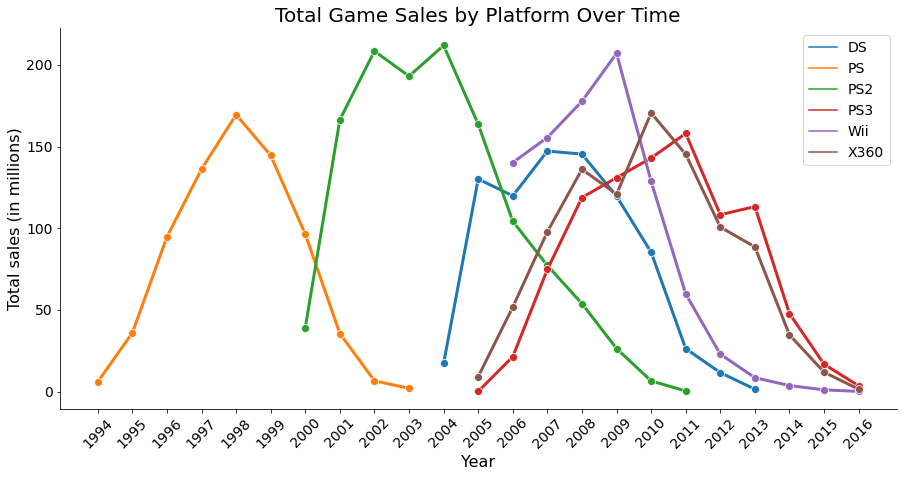

In [42]:
# Graph trendlines by platform
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data= yearly_plat_sales,
             x='year_of_release',
             y='total_sales',
             hue='platform',
             marker= 'o',
             markersize = 8,
             linewidth = 3)

ax.set_title( 'Total Game Sales by Platform Over Time' , size = 20 )
ax.set_xticks(yearly_plat_sales['year_of_release'].unique());
ax.legend(fontsize = 14)
plt.xlabel('Year', size=16);
plt.ylabel('Total sales (in millions)', size=16);
plt.xticks(rotation=45);
ax.tick_params(axis='both', which='major', labelsize=14)
sns.despine()


<div style="border:solid blue 2px; padding: 20px">       
<b>Sale Trend Analysis</b><br>
Several popular platforms have been retired. The PS, PS2, and the DS have all been replaced by newer generations of consoles with more advanced technology.<br>
    
Consoles tend to be released at the end of the year in time for the holidays, making their first year sales artificially low with only 2 months of sales to account for. Sales generally increase in the second year. However, the  release of the Wii in 2006 disrupted the whole market with their new motion sensor game technology. Wii sales started outrageously high and cannabilized the sales of the recently released PS3 and X360. Overall, platforms tend to increase sales for the first few years, and taper off as newer generations are released by their parent companies. Even the current platforms with 2016 sales represented here already have new generations released prior to 2016. <br>

We see the same trend from our overall game sales lollipop graph mirrored in this graph. In recent years, game sales have declined overall.<br>
    
</div>

#### 3.2.3 Lifespan of Platforms

In [43]:
#Drop row where DS has a false min at 1985
games_cleaner = games_clean.drop(games_clean[
                                            (games_clean['year_of_release']==1985) & 
                                            (games_clean['platform']=='DS')
                                            ].index
                                )
games_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16572 entries, 0 to 16572
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16572 non-null  object  
 1   platform         16572 non-null  object  
 2   year_of_release  16572 non-null  int64   
 3   genre            16572 non-null  object  
 4   na_sales         16572 non-null  float64 
 5   eu_sales         16572 non-null  float64 
 6   jp_sales         16572 non-null  float64 
 7   other_sales      16572 non-null  float64 
 8   critic_score     9040 non-null   float64 
 9   user_score       8643 non-null   float64 
 10  rating           10309 non-null  category
 11  total_sales      16572 non-null  float64 
 12  company          16572 non-null  category
dtypes: category(2), float64(7), int64(1), object(3)
memory usage: 1.5+ MB


In [44]:
# Calculate the min and max release years per platform
plat_years= (games_cleaner.groupby(['company','platform'])
                          .agg({'year_of_release':['min', 'max']}).dropna()
                          .droplevel(axis=1, level=0)
                          .rename(columns={'min':'year_min','max':'year_max'})
                          .sort_values(['company','year_min','year_max'], ascending=False)
                          .reset_index()
            )

#Remove platforms with only 1 year of data
plat_years = plat_years[lambda r: r.year_max != r.year_min].reset_index(drop=True)
plat_years[['year_min','year_max']] = plat_years[['year_min','year_max']].astype('int')

In [45]:
plat_years

,company,platform,year_min,year_max
0,Other,WS,1999,2001
1,Other,3DO,1994,1995
2,Other,NG,1993,1996
3,Other,PC,1985,2016
4,XBox,XOne,2013,2016
5,XBox,X360,2005,2016
6,XBox,XB,2000,2008
7,PlayStation,PS4,2013,2016
8,PlayStation,PSV,2011,2016
9,PlayStation,PS3,2005,2016


In [46]:
# Assign graph colors by company
company_color_dict= {'Atari':'dodgerblue',
                    'Sega': 'limegreen',
                    'Nintendo': 'gold',
                    'PlayStation': 'turquoise',
                    'XBox':'orangered',
                    'Other':'darkorchid'
                }
plat_years['color']=plat_years.company.map(company_color_dict)
#plat_years

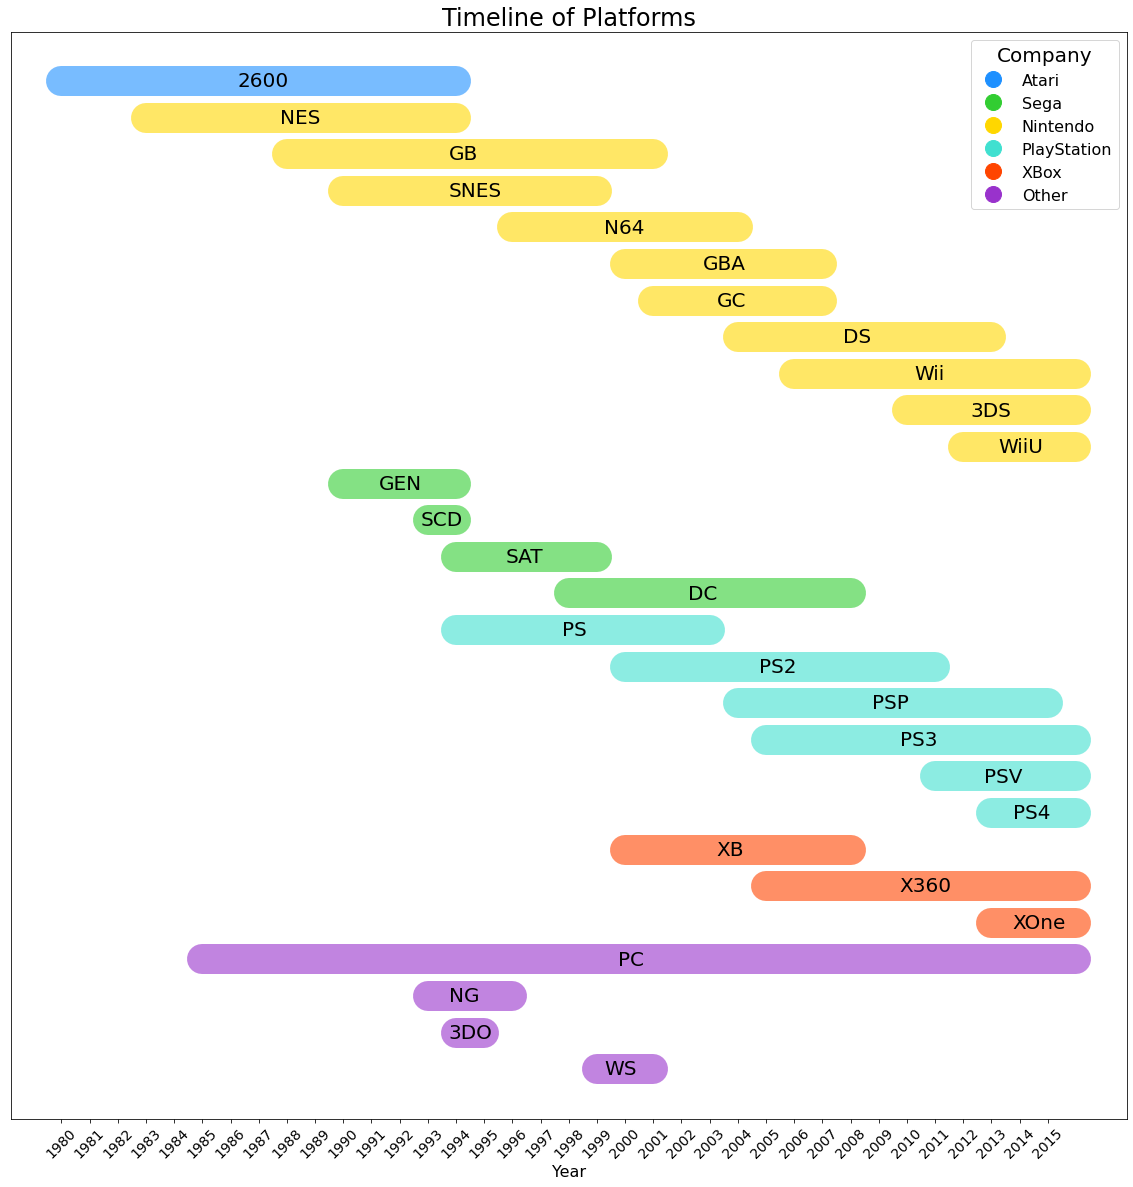

In [47]:
#Graph platform lifespans
fig,ax=plt.subplots(figsize = (20,20))
plt.hlines(y=plat_years.platform,
           xmin=plat_years.year_min,
           xmax= plat_years.year_max,
           alpha = .6,
           linewidth= 30,
           capstyle = 'round',
           color= plat_years.color
          )



markers = [plt.Line2D([0,0],[0,0],color=c, marker='o',markersize=16, linestyle='')
           for c in list(company_color_dict.values())]
ax.legend(title = "Company", title_fontsize= 20, handles = markers, labels = company_color_dict.keys(), fontsize=16)


ax.set_title( 'Timeline of Platforms', size = 24 )
plt.xlabel('Year', size=16);

ax.set_xticks(range(plat_years['year_min'].min(), 2016, 1));
ax.set_xticklabels(range(plat_years['year_min'].min(), 2016, 1),
                   rotation=45,
                   fontdict={'horizontalalignment':'center', 'size':14})
ax.yaxis.set_major_locator(plt.NullLocator())
ax.tick_params(which='major', labelsize=14)

for row in plat_years.itertuples():
    ax.text(x = ((row.year_min + row.year_max)/2-.75),
            y = row.platform, s=row.platform,
            va= 'center',
            size=20)
    
plt.show();

In [48]:
#Average lifespan of consoles

# Slice of platforms that are still releasing games
plat_years['lifespan'] = plat_years['year_max']-plat_years['year_min']
current_platforms = plat_years[plat_years['year_max'] == 2016]['platform'].tolist()
current_plat_years = plat_years.query('platform in @current_platforms & platform != "PC"')

# Slice of discontinued platforms from companies that are still on the market
relevant_companies = current_plat_years['company'].unique()
retired_plat_years = plat_years.query('company in @relevant_companies & year_max < 2016')


print('Average full lifespan of gaming consoles: {:.1f} years'.format(retired_plat_years.lifespan.mean()))
print('Average current lifespan of current gaming consoles: {:.1f} years'.format(current_plat_years.lifespan.mean()))
print('Currently active game consoles: {}'.format(current_platforms))
print('Note: PC data was not included in the analysis.')

Average full lifespan of gaming consoles: 9.3 years
Average current lifespan of current gaming consoles: 6.6 years
Currently active game consoles: ['PC', 'XOne', 'X360', 'PS4', 'PSV', 'PS3', 'WiiU', '3DS', 'Wii']
Note: PC data was not included in the analysis.


#### 3.2.5 Conclusion

<div class="alert alert-block alert-info">

All platforms released by Nintendo, XBox, and PlayStation tend to be successful. Home consoles are significant;y more profitable than handheld games on average, and this gap may increase with mobile games taking the place of handheld systems. The platforms have an average lifetime of 9.3 years, though focus shifts drastically toward newer systems. Each platform can expect to remain incredibly profitable for several years following release. However, drastic changes in technology such as motion sensors strongly impacts the market of older systems. We can expect to see siliar disruptions with future advancements such as widely available VR gaming.
    
</div>

### 3.3 Recent Market Data
Limit analysis to 2014 and later. This allows us to focus on trends for only the currently existing platforms, starting just after the releases of the 2 most recent platforms.

In [49]:
# Filter data for 2013 and up. Include 2013 to allow growth analysis for 2014
games_recent = games_cleaner.query('year_of_release > 2012')


#### 3.3.1 Year Over Year Growth of Platforms
Determine which platforms are experiencing growth

In [50]:
# Pivot table of platform sales by year
plat_year_pivot = pd.pivot_table(games_recent,
                                 index= 'platform',
                                 columns= 'year_of_release',
                                 values='total_sales',
                                 aggfunc='sum',
                                 fill_value=0)
plat_year_pivot

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,12.66,13.63,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.38,0.24,0.12,0.00
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


In [51]:
#Change in absolute growth per year
sales_delta_abs = plat_year_pivot.diff(axis=1)
sales_delta_abs

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00
PC,NaN,0.97,-5.11,-3.27
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65
PSP,NaN,-3.14,-0.12,-0.12
PSV,NaN,1.31,-5.65,-2.00
Wii,NaN,-4.84,-2.61,-0.96
WiiU,NaN,0.38,-5.68,-11.75


In [52]:
# Change in percent growth year over year
sales_delta_percent = plat_year_pivot.pct_change(axis=1).fillna(0).drop(2013, axis=1)
sales_delta_percent

year_of_release,2014,2015,2016
platform,,,
3DS,-0.226445,-0.365174,-0.455004
DS,-1.000000,0.000000,0.000000
PC,0.076619,-0.374908,-0.383803
PS3,-0.578278,-0.647822,-0.785969
PS4,2.847634,0.189000,-0.417578
PSP,-0.928994,-0.500000,-1.000000
PSV,0.123702,-0.474790,-0.320000
Wii,-0.563446,-0.696000,-0.842105
WiiU,0.017552,-0.257830,-0.718654


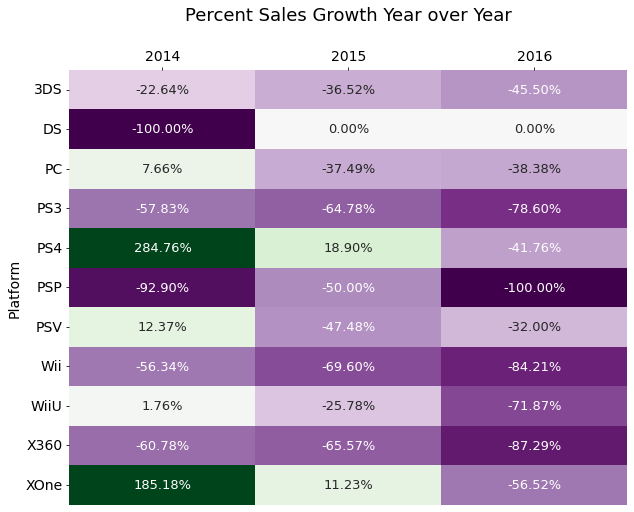

In [53]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(sales_delta_percent,
                 annot=True, fmt='.02%',
                 annot_kws={"fontsize":13},
                 cmap='PRGn', cbar=False,
                 vmin=-1, vmax=1, center=0
                )
plt.title('Percent Sales Growth Year over Year', size = 18, y=1.1);
plt.xlabel('');
plt.ylabel('Platform', size=14);
plt.yticks(rotation=0)

ax.tick_params(labelsize=14)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.show()


<div style="border:solid blue 2px; padding: 20px">       
<b>Sales Growth Analysis</b><br>
    
The 2016 column can be ignored, as data for this year is incomplete and therefore provides artificially low sales data. Only the PS4 and XOne are currently experiencing growth following their releases. The WiiU which was released the year prior had a much less successful start that than its predecessors, and was quickly cannibalized by the simultaneous release of the PS4 and XOne. The X360, the Wii, and the PS3 seem to be declining at equal rates as their new counterparts overtake the market.<PC>
    
PC games enjoyed a bit of growth in 2014, but then started to decline again in 2015.
    
</div>

### 3.3.2 Distribution of Sales for Current Platforms

In [54]:
#Filter out 2013 data
games_recent = games_cleaner.query('year_of_release > 2013')

In [55]:
# Platforms & global sales for currently active platforms
plat_sales_recent = (games_recent[['platform', 'total_sales']]
                     .query('platform in @current_platforms')
                     .reset_index(drop=True)
                    )
# List ordering platforms least to most profitable
plat_order= (plat_sales_recent.groupby('platform')['total_sales']
                              .sum()
                              .reset_index()
                              .sort_values('total_sales')
                              ['platform'].reset_index(drop=True)
            )

In [56]:
#Assign company colors to palette
palette_dict = {}
for p in plat_order:
    for k, v in plat_company.items():
        if p in v:
            co = k 
            palette_dict[p] = company_color_dict[co]
palette_dict

{'Wii': 'gold',
 'PSV': 'turquoise',
 'PC': 'darkorchid',
 'WiiU': 'gold',
 'X360': 'orangered',
 'PS3': 'turquoise',
 '3DS': 'gold',
 'XOne': 'orangered',
 'PS4': 'turquoise'}

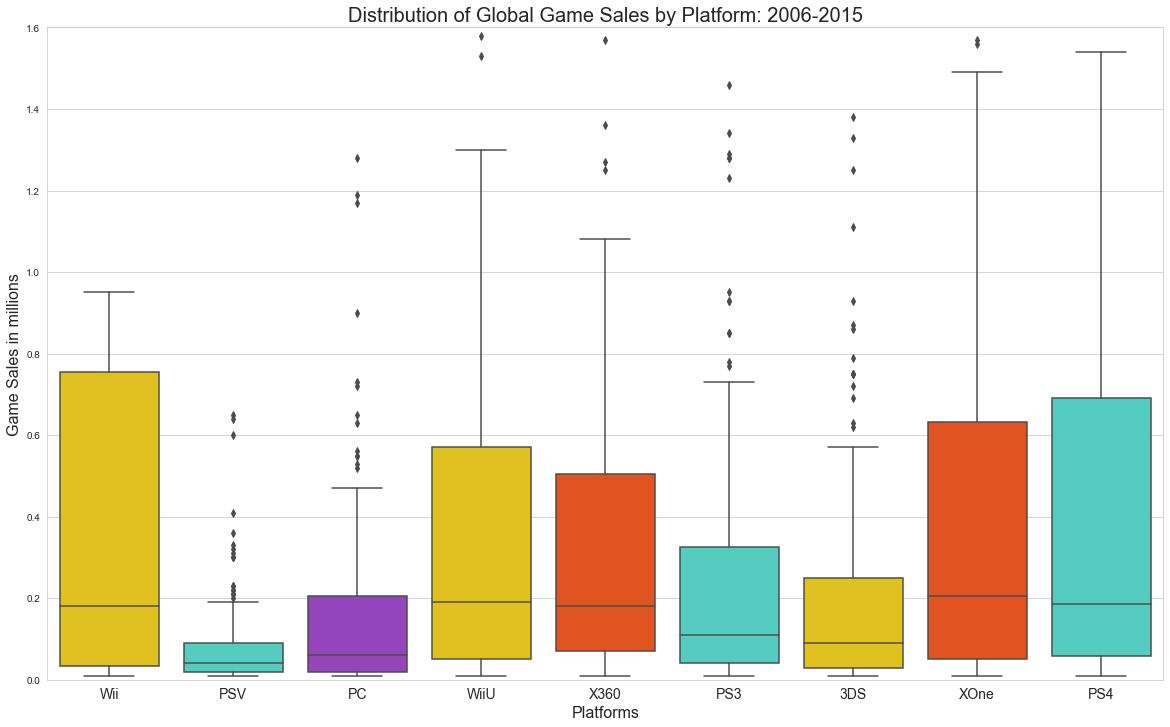

In [57]:
# Plot distribution of global sales per platform
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (20,12))
sns.boxplot(data = plat_sales_recent,
            x='platform',
            y='total_sales',
            palette = palette_dict,
            order = plat_order
            )

ax.set_title('Distribution of Global Game Sales by Platform: 2006-2015', fontsize= 20)
ax.set_xlabel('Platforms',fontsize=16)
ax.set_ylabel('Game Sales in millions',fontsize=16)
ax.set_xticklabels(plat_order,
                   fontdict={'horizontalalignment':'center', 'size':14})

plt.ylim(0,1.6)

plt.show()

In [58]:
#Summary of outliers not visible in the graph
over_25=(plat_sales_recent.query('total_sales > 1.75')
                          .pivot_table(index= 'platform', values='total_sales', aggfunc = ('count','mean','sum'))
        )
over_25.sort_values('sum', ascending = False)

,count,mean,sum
platform,,,
PS4,46,4.113043,189.20
XOne,21,3.383810,71.06
3DS,11,4.459091,49.05
WiiU,4,4.902500,19.61
PS3,4,4.152500,16.61
X360,4,2.792500,11.17
PC,1,3.050000,3.05
Wii,1,2.010000,2.01
PSV,1,1.960000,1.96


<div style="border:solid blue 2px; padding: 20px">       
<b>Sales Distribution Analysis</b><br>
    
- PSV games have the lowest average sales with a fairly small range, followed by PC games.
- 3DS games perform significantly better than PlayStation's counterpart, the PSV.
- All home consoles except the PS3 have similar median values. However, the new generation platforms (PS4, XOne, and WiiU) have a higher spread in the 2nd & 3rd quartiles. This implies higher mean sales values.
- The PS4 has the highest Q3 & Q4 values, meaning it has more higher-earning games. The PS4 also seems to be replacing the PS3 much faster than the the other new generation platforms.
    
</div>

### 3.4 Effect of Reviews on Game Sales

Explore the correlation between critic and user reviews on game sales.

In [59]:
# Find the platform with the most critic and user scores
games_recent[games_recent.notnull().all(axis=1)].platform.value_counts()

PS4     260
XOne    182
PS3     119
PC      110
X360     86
PSV      81
3DS      64
WiiU     51
Wii       8
PSP       1
Name: platform, dtype: int64

In [60]:
# Function to calculate and graph corr of scores & global sales
def score_sales_corr(p):
    reviews = (games_recent[games_recent.platform == p]
                            [['total_sales','critic_score','user_score']]
                            .dropna(how="any")
               )
    reviews['user_score'] = reviews['user_score']*10
    
    # Plot critic & user reviews against total_sales
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
    fig.suptitle('Relationship Between Game Sales and Reviews ({})'.format(p), size=20)

    sns.scatterplot(ax=axes[0],
                data= reviews,
                x= 'critic_score',
                y= 'total_sales',
                color='orchid')

    sns.scatterplot(ax=axes[1], 
                data= reviews,
                x='user_score',
                y='total_sales');

    axes[0].set_title('Critic Score' , size = 18 );
    axes[1].set_title('User Score' , size = 18 );

    for ax in axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel('Score', size=14);
        ax.set_ylabel('Global Sales (mil.)', size=14);
        ax.set_ylim(0,5)
        ax.set_xticks(np.arange(0,110, 10))
    plt.show()
    
    #Print correlation table
    score_corr = reviews[['critic_score', 'user_score', 'total_sales']].corr()
    print('Sales-Review Correlation for {}'.format(p))
    print(score_corr)

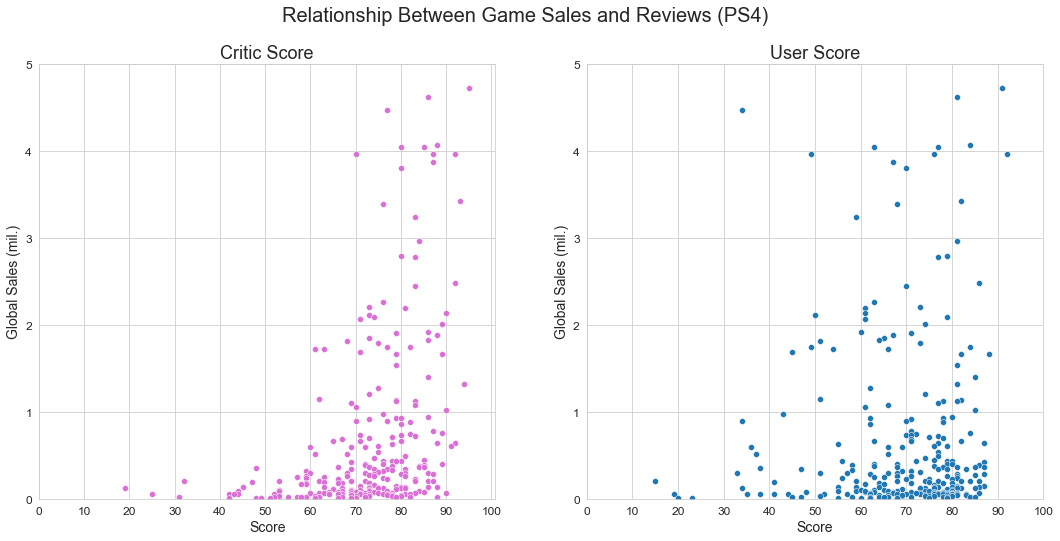

Sales-Review Correlation for PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.559902     0.387721
user_score        0.559902    1.000000    -0.028982
total_sales       0.387721   -0.028982     1.000000


In [61]:
# Print all corr for X360
score_sales_corr('PS4')

<div style="border:solid blue 2px; padding: 20px">       
<b> Correlation Analysis for PS4</b><br>
    
    
Games with low sales are much more common, and can be found with a wide range of scores. Though higher sales do tend toward higher critic scores (corr: .39). User scores don't show any correlation, and we can see a smattering of games with very high sales and much lower scores (corr:-.03).
    
Critics are professionals, and will tend to give a far more fair analysis of a game. They commonly review games close to the time of release, sometimes even beforehand. This could have an effect on people choosing whether or not to buy a new game. Users however tend to only review games they have stronger feelings about, particularly negative feelings. This will pull down the average user ratings. 
    
Well-reviewed games with low sales can be caused by many things. Many games are released by smaller companies with lower budgets, and so their advertising may be limited. There are also games that are more mainstrain, versus indie or niche games that despite being well-made just have a smaller audience.
    
</div>

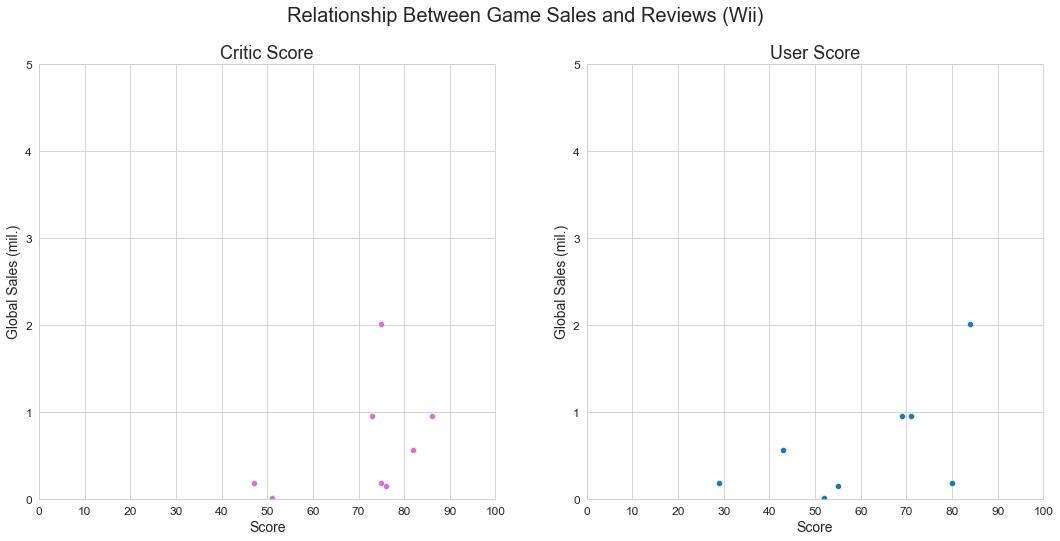

Sales-Review Correlation for Wii
              critic_score  user_score  total_sales
critic_score      1.000000    0.564272     0.443302
user_score        0.564272    1.000000     0.597349
total_sales       0.443302    0.597349     1.000000


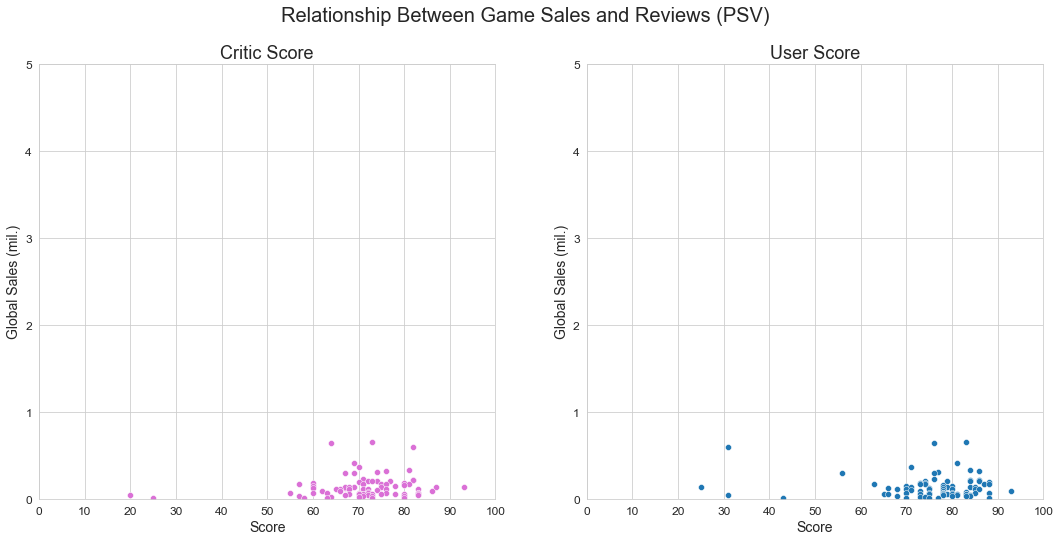

Sales-Review Correlation for PSV
              critic_score  user_score  total_sales
critic_score      1.000000    0.499115     0.154103
user_score        0.499115    1.000000    -0.082223
total_sales       0.154103   -0.082223     1.000000


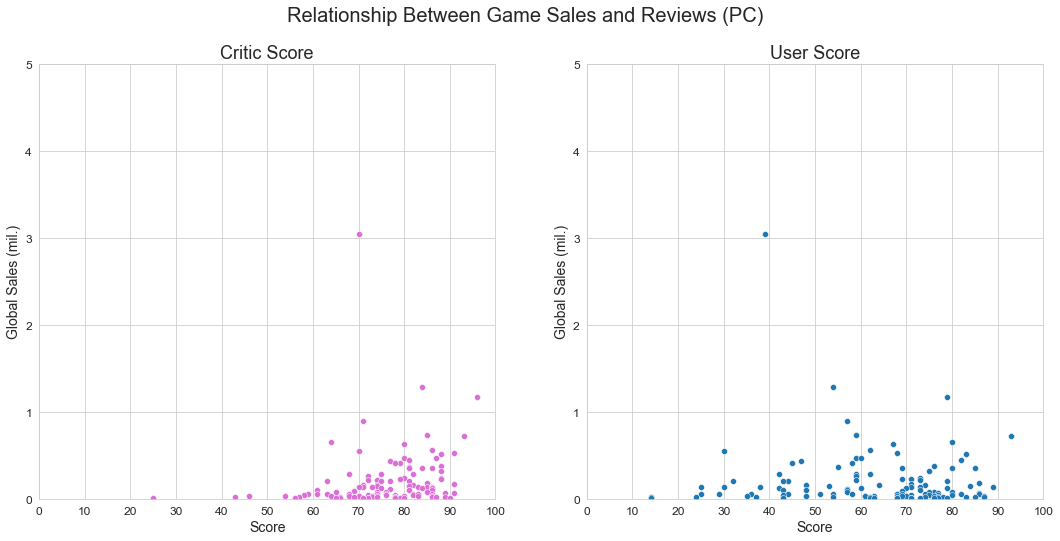

Sales-Review Correlation for PC
              critic_score  user_score  total_sales
critic_score      1.000000    0.521700     0.179197
user_score        0.521700    1.000000    -0.058032
total_sales       0.179197   -0.058032     1.000000


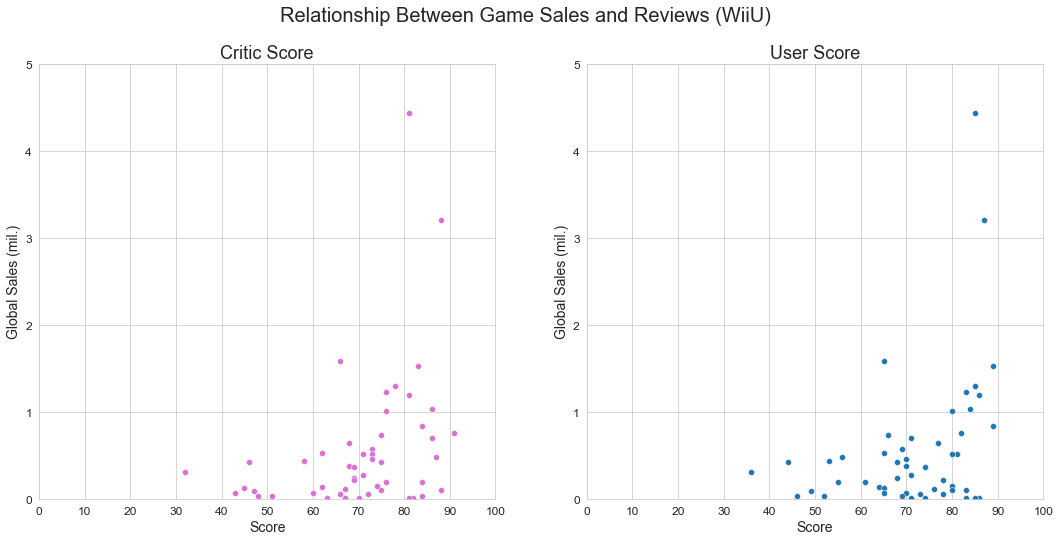

Sales-Review Correlation for WiiU
              critic_score  user_score  total_sales
critic_score      1.000000    0.706178     0.364667
user_score        0.706178    1.000000     0.387460
total_sales       0.364667    0.387460     1.000000


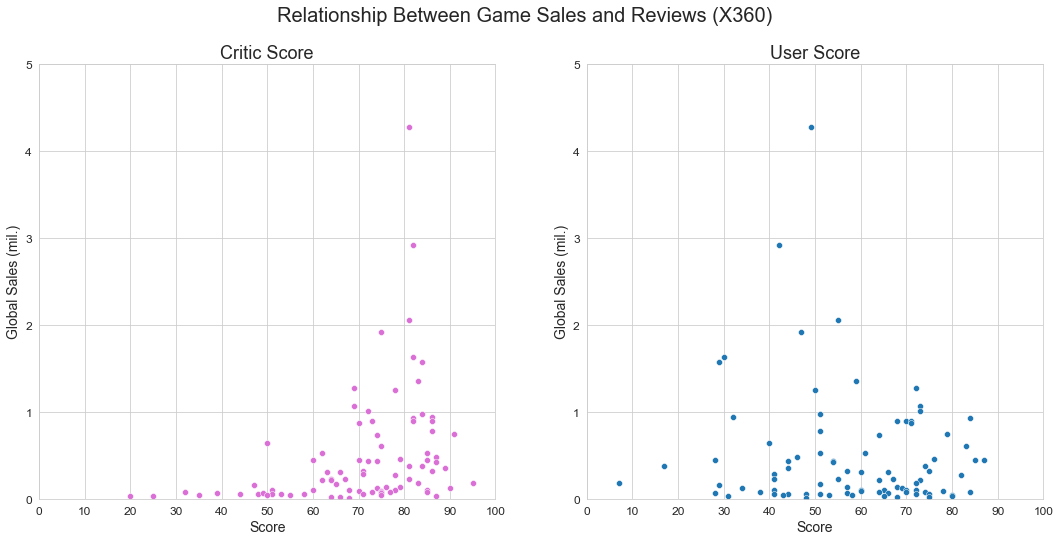

Sales-Review Correlation for X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.162009     0.332273
user_score        0.162009    1.000000    -0.120901
total_sales       0.332273   -0.120901     1.000000


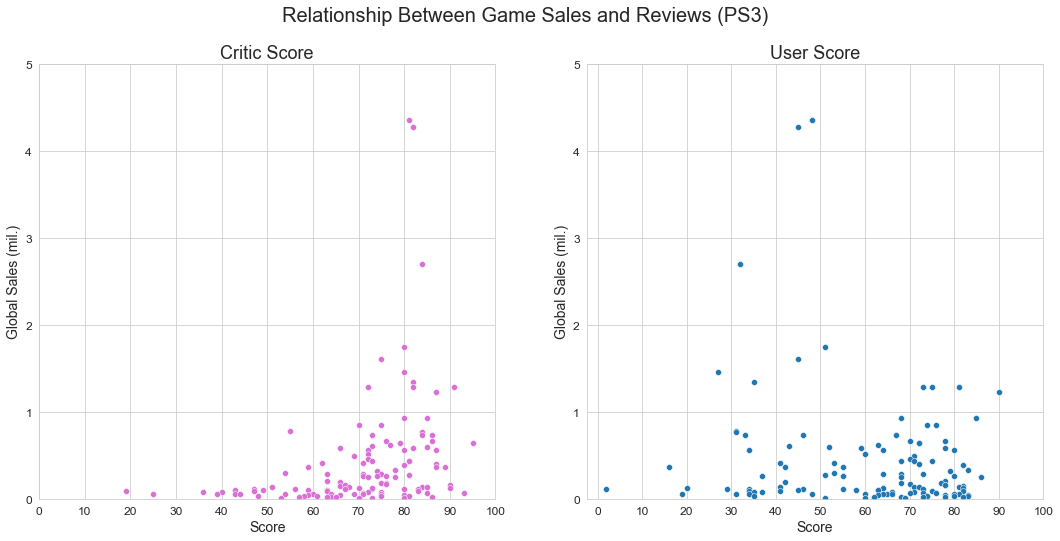

Sales-Review Correlation for PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.319826     0.321967
user_score        0.319826    1.000000    -0.146884
total_sales       0.321967   -0.146884     1.000000


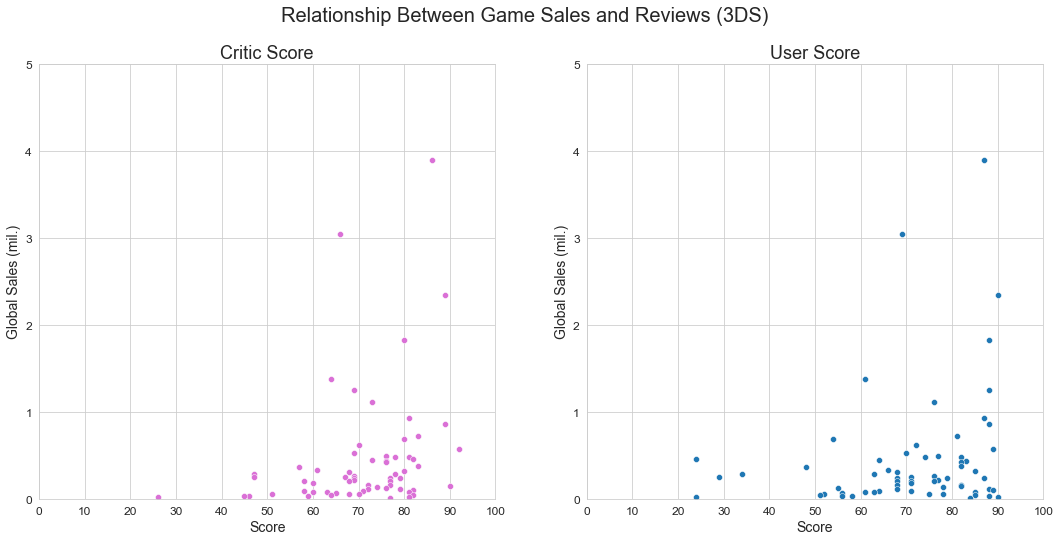

Sales-Review Correlation for 3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.616592     0.277566
user_score        0.616592    1.000000     0.218911
total_sales       0.277566    0.218911     1.000000


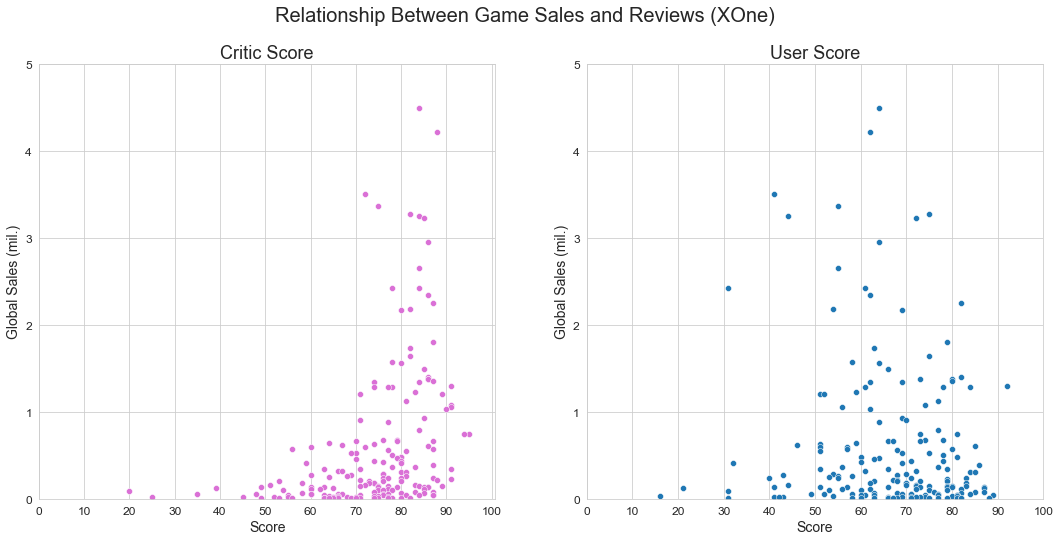

Sales-Review Correlation for XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.452597     0.380371
user_score        0.452597    1.000000    -0.093250
total_sales       0.380371   -0.093250     1.000000


In [62]:
#Create platform list excluding x360
plat_list = plat_order[plat_order != 'PS4']

for p in plat_list:
    score_sales_corr(p)

<div style="border:solid blue 2px; padding: 20px">       
<b> Correlation Analysis for Other Platforms</b><br>
    
- Wii, WiiU, & DS: The correlations for user score & critic score are much more consistent with each other, though the data sets for 2014+ are very limited. These are all Nintendo platforms that are more popular in Japan, so maybe Japanese games rate their games more fairly than in other regions.
- PSV: The PSV is just so generally unpopular, that sales are always low regardless of any other factor.
- PC: follows trends identified with the PS4, though with a much weaker correlation. Like the PSV, these games just tend to generally perform low in sales.
-X360, PS3, & XOne: These platforms follow fairly similar patterns to the PS4 described above.
    
</div>

### 3.5 Sales by Genre
Explore profitibility of different game genres

In [63]:
recent_genre = games_recent.pivot_table(index = 'genre',
                                        values = 'total_sales',
                                        aggfunc= ('sum','count')).reset_index()
recent_genre['avg_sales'] = recent_genre['sum']/recent_genre['count']
recent_genre = recent_genre.sort_values('avg_sales').reset_index(drop=True)
recent_genre

,genre,count,sum,avg_sales
0,Adventure,185,17.55,0.094865
1,Strategy,37,3.96,0.107027
2,Puzzle,14,2.21,0.157857
3,Simulation,44,13.13,0.298409
4,Action,620,199.71,0.322113
5,Misc,113,37.55,0.332301
6,Racing,69,27.52,0.398841
7,Role-Playing,221,101.44,0.459005
8,Fighting,60,28.22,0.470333
9,Platform,38,18.09,0.476053


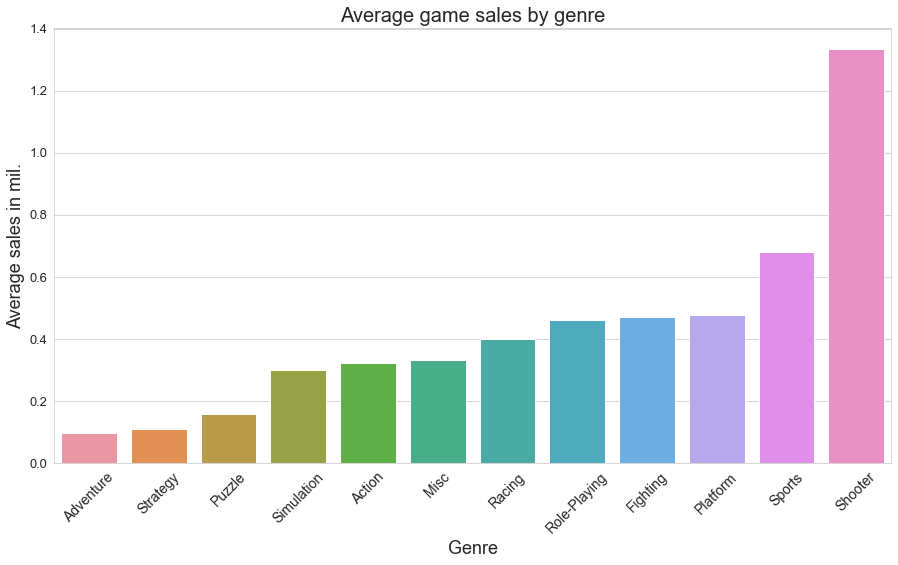

In [64]:
# Plot sale averages by genre
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=recent_genre, 
             x="genre", 
             y="avg_sales")
ax.set_title( 'Average game sales by genre' , size = 20 )
plt.xlabel('Genre', size=18);
plt.ylabel('Average sales in mil.', size=18);
plt.yticks(size=13)
plt.xticks(rotation=45, size=14);



In [65]:
g_sum = recent_genre[['genre','sum']].sort_values('sum', ascending = False).reset_index(drop=True)
g_sum['rank'] = g_sum.index
g_count = recent_genre[['genre','count']].sort_values('count', ascending = False).reset_index(drop=True)
g_count['rank'] = g_count.index
g_sum.merge(g_count, on='rank')

,genre_x,sum,rank,genre_y,count
0,Action,199.71,0,Action,620
1,Shooter,170.94,1,Role-Playing,221
2,Sports,109.48,2,Adventure,185
3,Role-Playing,101.44,3,Sports,161
4,Misc,37.55,4,Shooter,128
5,Fighting,28.22,5,Misc,113
6,Racing,27.52,6,Racing,69
7,Platform,18.09,7,Fighting,60
8,Adventure,17.55,8,Simulation,44
9,Simulation,13.13,9,Platform,38


<div style="border:solid blue 2px; padding: 20px">       
<b> Game Genre Profitibility</b><br>
    
Genre popularity does not necessarily match with profitability.<br>
    
Shooters have double the average sales of Sports games (2nd highest average), but the are the 5th most produced genre. This still brings Shooters to the 2nd highest overall sales.
    
Action games are the most common and the highest grossing genre, but they only fall in 8th place out of 12. The market is so saturated that there is likely more variance between action games, but they really have to be special to stand apart. <br>
    
Adventure games are the 3rd most common type, but come in last for average sales. 
    
Platform games are very uncommon, but still rank high in both average sals and overall sales considering their limited titles. Culturally, these games tend to be highly recognizable and beloved for their simple concepts.<br>  
    
Strategy & Puzzle games rank low across all measures. 
    
</div>

## Step 4. Understanding Regional Markets


### 4.1 Top 5 Platforms by Region

In [66]:
# function that returns the top 5 items and corresponding sum
def top5(col,region):
    c_r = (games_recent[[col,region]]
                .groupby(col)[region]
                .sum()
                .reset_index()
                .sort_values(region,ascending=True)
                .tail().reset_index(drop=True))
    return c_r

plat5_na = top5('platform','na_sales')
plat5_eu = top5('platform','eu_sales')
plat5_jp = top5('platform','jp_sales')
merged_plat5 = (plat5_na.merge(plat5_eu, on='platform', how='outer')
                        .merge(plat5_jp, on='platform', how='outer')
                ).fillna(0)

merged_plat5

,platform,na_sales,eu_sales,jp_sales
0,PS3,22.05,25.54,11.22
1,3DS,22.64,16.12,44.24
2,X360,28.30,0.00,0.00
3,XOne,81.27,46.25,0.00
4,PS4,98.61,130.04,15.02
5,PC,0.00,18.22,0.00
6,WiiU,0.00,0.00,7.31
7,PSV,0.00,0.00,14.54


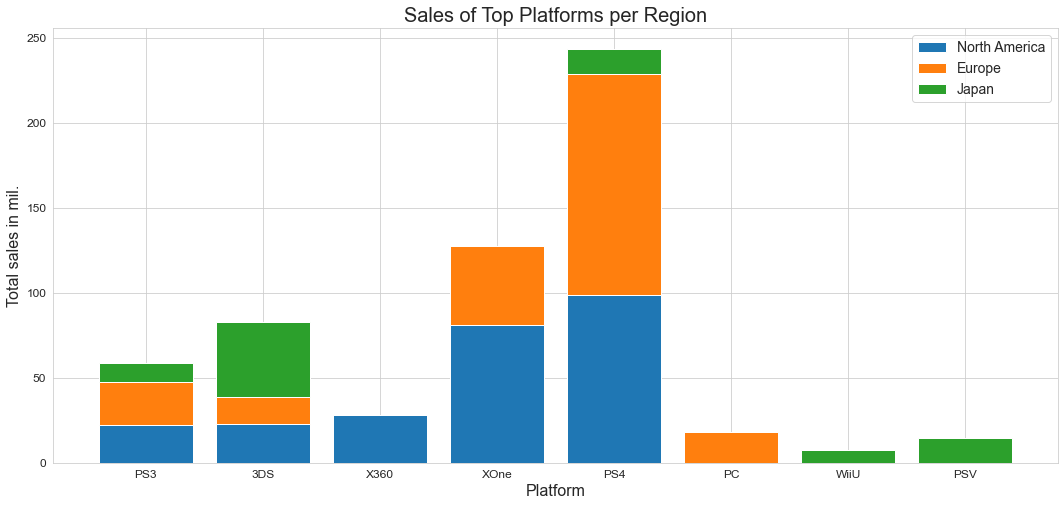

In [67]:
fig, ax = plt.subplots(figsize=(18,8))  
platforms = merged_plat5.platform


ax.bar(merged_plat5['platform'], merged_plat5['na_sales'], label='North America')
ax.bar(merged_plat5['platform'], merged_plat5['eu_sales'], label='Europe', bottom = merged_plat5['na_sales'])
ax.bar(merged_plat5['platform'], merged_plat5['jp_sales'], label='Japan', bottom = merged_plat5['na_sales']+merged_plat5['eu_sales'])

ax.set_title('Sales of Top Platforms per Region',size=20)
ax.set_xlabel('Platform', size=16);
ax.set_ylabel('Total sales in mil.', size=16);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize = 14);



<div style="border:solid blue 2px; padding: 20px">       
<b> Regional Popularity of Platforms </b><br>

- North American sales have the largest impact on overall sales, with the top 5 platforms worldwide being directly linked to the top 5 platforms in NA.
- Europe & Japan show a strong preference for PlayStation platforms, possibly because Playstation is a more global company than the America-based XBox.
- PC gaming has a stronger hold in Europe, which generally has a widespread PC gaming culture.
- Japan strongly favors handheld platforms, with a particular preference for the 3DS. It is also the only country inn which the WiiU is notably popular, possibly due to Nintendo being native to Japan.
    
</div>

### 4.2 Top 5 Genres by Region

In [68]:
genre5_na = top5('genre','na_sales')
genre5_eu = top5('genre','eu_sales')
genre5_jp = top5('genre','jp_sales')
merged_genre5 = (genre5_na.merge(genre5_eu, on='genre', how='outer')
                        .merge(genre5_jp, on='genre', how='outer')
                ).fillna(0)

merged_genre5

,genre,na_sales,eu_sales,jp_sales
0,Misc,15.05,0.00,5.61
1,Role-Playing,33.47,28.17,31.16
2,Sports,46.13,45.73,0.00
3,Action,72.59,74.93,29.58
4,Shooter,79.02,65.52,4.87
5,Racing,0.00,14.13,0.00
6,Fighting,0.00,0.00,6.37


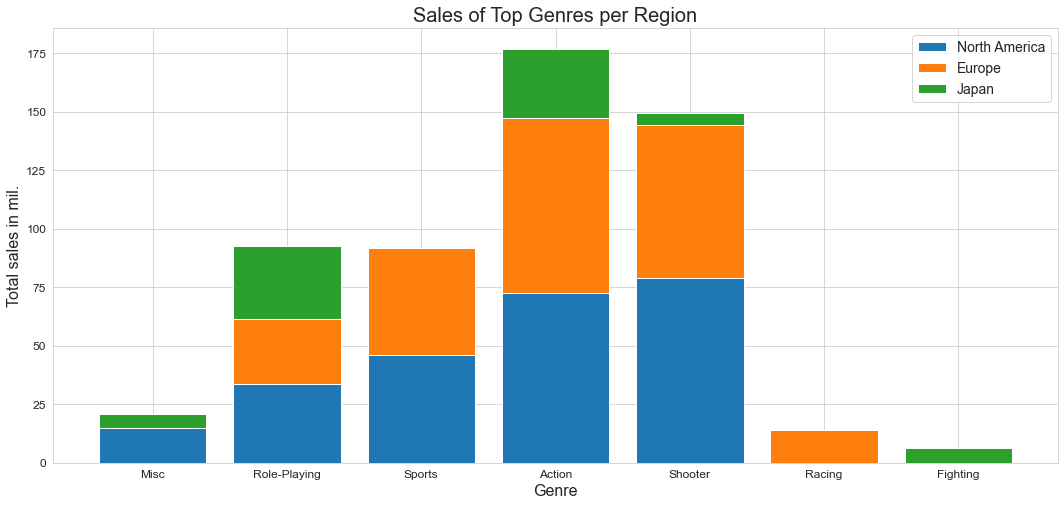

In [69]:
fig, ax = plt.subplots(figsize=(18,8))  

ax.bar(merged_genre5['genre'], merged_genre5['na_sales'], label='North America')
ax.bar(merged_genre5['genre'], merged_genre5['eu_sales'], label='Europe', bottom = merged_genre5['na_sales'])
ax.bar(merged_genre5['genre'], merged_genre5['jp_sales'], label='Japan', bottom = merged_genre5['na_sales'] + merged_genre5['eu_sales'])

ax.set_title('Sales of Top Genres per Region',size=20)
ax.set_xlabel('Genre', size=16);
ax.set_ylabel('Total sales in mil.', size=16);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize = 14);

<div style="border:solid blue 2px; padding: 20px">       
<b> Game Genre Profitibility</b><br>
    
- Again NA sales are the driving force of global sales, with action games having the largest market share. 
- Shooter games are the top genre in North America, but are much less prevalent in Japan.
- Action games and role-playing games enjoy a global popularity.
- Sports games are notably missing from the Japanese market, replaced by fighting games.
- Roleplaying games replace action as the top genre in Japan, but are not popular in Europe.
- The European market has a fondness for racing games, but otherwise mirrors NA trends.
    
</div>

### 4.3 ESRB Rating Effect on Sales by Region

In [70]:
#Information on total sales per region
(games_recent[['rating','total_sales']]
             .groupby('rating')['total_sales']
              .agg(['mean','sum','count']).reset_index())

,rating,mean,sum,count
0,AO,NaN,0.00,0
1,E,0.585439,133.48,228
2,E10+,0.383265,75.12,196
3,M,0.797832,246.53,309
4,T,0.343212,103.65,302


E rated games are the most common games with the highest overall sales. But despite having the lowest number of games, M rated games bring in the highest profit on average. We will explore both mean and sum values for a better understanding of the market

In [71]:
def esrb_sales(func, region):
    r_sales = (games_recent[['rating',region]]
                .groupby('rating')[region]
                .agg(func).reset_index()
                )
    return r_sales

In [72]:
rating_na = esrb_sales('mean','na_sales')
rating_eu = esrb_sales('mean','eu_sales')
rating_jp = esrb_sales('mean','jp_sales')
merged_rating_mean = (rating_na.merge(rating_eu, on='rating')
                               .merge(rating_jp, on='rating')
                     )

merged_rating_mean = merged_rating_mean[merged_rating_mean.rating != 'AO']
merged_rating_mean

,rating,na_sales,eu_sales,jp_sales
1,E,0.222719,0.255702,0.039386
2,E10+,0.176480,0.140459,0.024337
3,M,0.337605,0.330421,0.027864
4,T,0.133377,0.116987,0.053907


In [73]:
rating_na = esrb_sales('sum','na_sales')
rating_eu = esrb_sales('sum','eu_sales')
rating_jp = esrb_sales('sum','jp_sales')
merged_rating_sum = (rating_na.merge(rating_eu, on='rating')
                              .merge(rating_jp, on='rating')
                    )

merged_rating_sum = merged_rating_sum[merged_rating_sum.rating != 'AO']
merged_rating_sum

,rating,na_sales,eu_sales,jp_sales
1,E,50.78,58.30,8.98
2,E10+,34.59,27.53,4.77
3,M,104.32,102.10,8.61
4,T,40.28,35.33,16.28


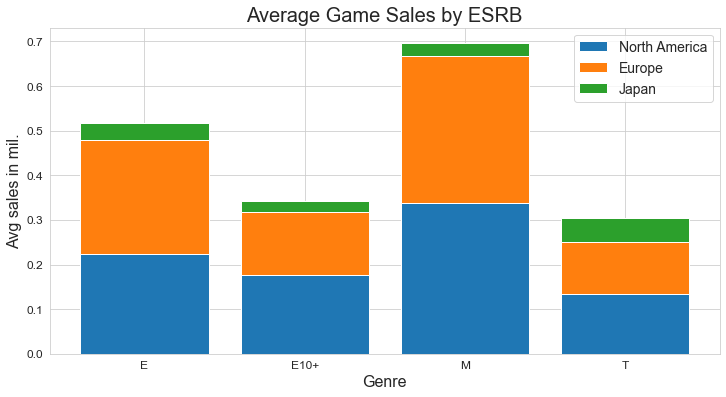

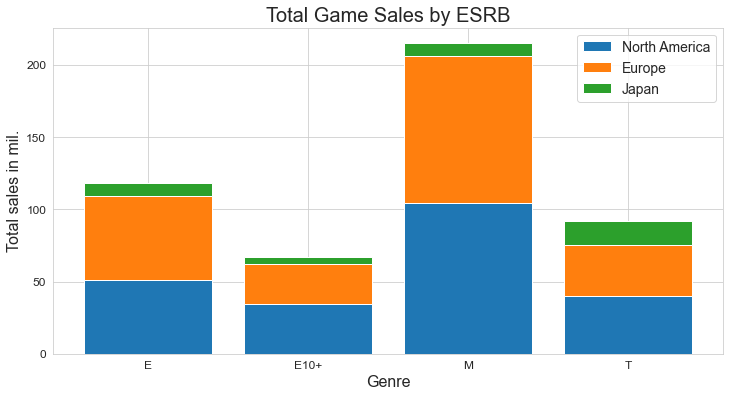

In [74]:
n=0
for df in [merged_rating_mean, merged_rating_sum]:
    fig, ax = plt.subplots(figsize=(12,6))  

    ax.bar(df['rating'], df['na_sales'], label='North America')
    ax.bar(df['rating'], df['eu_sales'], label='Europe', bottom = df['na_sales'])
    ax.bar(df['rating'], df['jp_sales'], label='Japan', bottom = df['na_sales']+df['eu_sales'])
    if n == 0:
        ax.set_title('Average Game Sales by ESRB',size=20)
        ax.set_ylabel('Avg sales in mil.', size=16);
    if n == 1:
        ax.set_title('Total Game Sales by ESRB',size=20)
        ax.set_ylabel('Total sales in mil.', size=16);

    ax.set_xlabel('Genre', size=16);
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize = 14);
    plt.show()
    n+=1

<div style="border:solid blue 2px; padding: 20px">       
<b> ESRB Ratings by Region </b><br>

The European & North American markets follows very similar patterns. M rated games dominate the market, with E rated games coming in second for both average sales and overall sales. T & E10+ averages are fairly close within both regions.

Japan's market is very different, with T rated games being the most profitable. This is followed by E, M, and finally E10+ games.

    
</div>

## Step 5. Hypothesis Testing

### 5.1 Difference in user ratings of XBox One & PC games
**Null hypothesis:** Average user ratings of the Xbox One and PC games are the same. <br>
**Alt hypothesis:** Average user ratings of the Xbox One and PC games differ.

In [75]:
# Create slices of xbox user scores and pc user scores
xbox_score= games_recent[games_recent.platform == 'XOne'][['platform','user_score']].dropna(how='any')
pc_score = games_recent[games_recent.platform == 'PC'][['platform','user_score']].dropna(how='any')

# Test for equal variance between sets
print('XOne var:',np.var(xbox_score['user_score']))
print('PC var',np.var(pc_score['user_score']))

XOne var: 1.8776439629349677
PC var 2.9862408949011456


In [76]:
# Calculate mean user_scores for each platform
xbox_mean = xbox_score['user_score'].mean()
pc_mean = pc_score['user_score'].mean()
# Calculate p value
results = st.ttest_ind(xbox_score['user_score'], pc_score['user_score'], equal_var = False)
alpha = .05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
    print('Average user_score DOES differ between XBox One and PC games.')
    print('Mean user scores: XBox One - {:.2f}, PC - {:.2f}'.format(xbox_mean,pc_mean))
    if  xbox_mean > pc_mean:
        print('XBox One games were rated higher on average.')
    else:
        print('PC games were rated higher on average.')
else:
    print("We can't reject the null hypothesis.")
    print('Average user_score DOES NOT differ between XBox One and PC games.')
    


p-value: 0.02952086418807545
We reject the null hypothesis.
Average user_score DOES differ between XBox One and PC games.
Mean user scores: XBox One - 6.69, PC - 6.29
XBox One games were rated higher on average.


#### Conclusion
<div class="alert alert-block alert-info">

At a .05 signficance level, PC games appear to have a higher average rating than XBox One games. PC gamers are a smaller, less mainstream market. These games on average are for more dedicated gamers who are more concerned with the quality of their games. XBox games cover a much wider market of people, possible leading to more accessible, lower quality games being released alongside higher quality games. 
    
</div>

### 5.2 Difference in user ratings of action and sports games
**Null hypothesis:** Average user ratings of action and sports games are the same. <br>
**Alt hypothesis:** Average user ratings of action and sports games differ.

In [77]:
# Create slices of user scores for actionn and sports genres
action_score= games_recent[games_recent.genre == 'Action'][['genre','user_score']].dropna(how='any')
sports_score = games_recent[games_recent.genre == 'Sports'][['genre','user_score']].dropna(how='any')

# Test for equal variance between sets
print('Action var:',np.var(action_score['user_score']))
print('Sports var',np.var(sports_score['user_score']))

Action var: 1.933203444972915
Sports var 3.366336540368975


In [78]:
# Calculate mean user score of each genre
action_mean = action_score['user_score'].mean()
sports_mean = sports_score['user_score'].mean()
# Calculate p value
results = st.ttest_ind(action_score['user_score'], sports_score['user_score'], equal_var = False)
alpha = .05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
    print('Average user_score DOES differ between action and sports games.')
    print('Mean user scores: Action - {:.2f}, Sports - {:.2f}'.format(action_mean,sports_mean))
    if  action_mean > pc_mean:
        print('Action games were rated higher on average.')
    else:
        print('Sports games were rated higher on average.')
else:
    print("We can't reject the null hypothesis.")
    print('Average user_score DOES NOT differ action and sports games.')

p-value: 7.329089851859161e-18
We reject the null hypothesis.
Average user_score DOES differ between action and sports games.
Mean user scores: Action - 6.79, Sports - 5.17
Action games were rated higher on average.


#### Conclusion
<div class="alert alert-block alert-info">
We could have set any significance level, and action games would still show a significant difference in average user ratings than sports games. Sport games are much more straightforward and limited to a fairly simple "world." They are also frequently traded in for new versions to follow real-world sports. Action games sometimes have deeply involved plots and world-building, whose complexity adds to the overall user experience. 
</div>

## 6. Overall conclusion

Ice should be aware of new platform releases. With the release of a new platform, money should be reallocated from the previous generation of that company. If their is knowledge of a significant change in technology, extra resources should be put toward games for that platform. The excitement of new technologies will likely add an extra boost to initial sales.

When considering overall global sales, the North American market has the largest influence. However, entirely different strategies have to be adopted for the Japanese market.

Home consoles perform better than their handheld counterparts across all regions. Though handheld platforms are very popular in Japan.

Playstation seems to have the strongest hold worldwide, but in the North American market it competes directly with Xbox.

There is a large and diverse market for E rated games and action games. While these markets are full of opportunity, they don't average as high as more specific markets. In North America and Europe, there is a lot more money to be made by focusing on M rated games, particularly shooters. The shooter market is less saturated and more profitable on average than action or sports games, those these are fairly "safe" markets to invest into. Meanwhile, in Japan, resources should be focused more heavily on the teen market and role-playing games.